<a href="https://colab.research.google.com/github/raunaksatone5/EDA---Capstone-Project/blob/main/EDA_Hotel_Booking_Analysis_by_Ronak_Satone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Problem Statement**: 

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things.  </b>
 </b>

To Achieve insight over the data we will divide the operations into below parts:

**1.Data Analysis**- Investigating the dataset, structure of data,pattern of data and finding any discripancies presents in data.

**2.Duplicate data reduction:** Finding and removing duplicate data.

**3.Null Value Processing**: Cleaning up unwanted null values, rows and columns.

**4.Outlier Treatment**: Finding and removing outliers (anamoly treatment).

**5. Structure Correction:** Converting data to relevant data type.

**6.Insights:** Get a deep visualization on cleaned data for better analysis.

### **DATA ANALYSIS**

---



In [1]:
# importing the required libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
import warnings
warnings.filterwarnings('ignore')

In [2]:
# mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# import the data
df = pd.read_csv('/content/drive/MyDrive/data set/Copy of Hotel Bookings.csv')
# showing first five rows
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# getting the size of the dataframe
df.shape

(119390, 32)

In [5]:
# checking the attributes of our data
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
# checking the metadata of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

### **Cleaning Data** : In this phase we are doing-
1) Remove duplicate rows.

2) Handling Null values. 

3) Outlier Treatment.

4) Data Type Corrections. 

5) Joining Columns.

1. Removing Duplicate rows


In [7]:
#Checking How mach duplicate we have
df[df.duplicated()].shape

(31994, 32)

In [8]:
# Dropping duplicate values
df.drop_duplicates(inplace = True)

In [9]:
df.shape

(87396, 32)

2. Handling Null Values.

In [10]:
# Analysing missing values.
df.isnull().sum().sort_values(ascending=False) 

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


we have 4 columns with missing values.Let's check how much data of these column containing null. If the null Data is Greater than 40% then we will delete the whole column else we will approach some other operations on it.

In [11]:
df.isnull().sum()/len(df.index)*100 

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.004577
babies                             0.000000
meal                               0.000000
country                            0.517186
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [12]:
# deleting company columns due to High Null Values(94%).
df=df.drop(['company'],axis=1) 

#filling Nan values of agent column with 0
df["agent"].fillna(0, inplace = True)  

In [13]:
# As Column children and country has less missing values so  We will remove the full row in which missing Values is present.
df = df.dropna(axis = 0)

In [14]:
# rechecking for null values
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

since we got rid of null values we can move to next step 

In [15]:
# Finding out Descriptive statistic of dataset.
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.000000,86940.00000,86940.000000,86940.000000,86940.000000,86940.000000
mean,0.275903,80.193375,2016.211824,26.841477,15.818024,1.007396,2.628744,1.878525,0.139211,0.010835,0.039234,0.030228,0.176708,0.271854,81.11210,0.753497,106.574804,0.083448,0.699459
std,0.446971,86.100147,0.686016,13.654505,8.834469,1.028763,2.043753,0.625860,0.456786,0.113592,0.194152,0.369574,1.717885,0.728090,109.94501,10.041816,54.957439,0.280402,0.831840
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,72.250000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.00000,0.000000,98.400000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.00000,0.000000,134.100000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.00000,391.000000,5400.000000,8.000000,5.000000


3. OUTLIER TREATMENT

Finding out irrelavant data of columns by plotting graphs for better understanding of outliers.

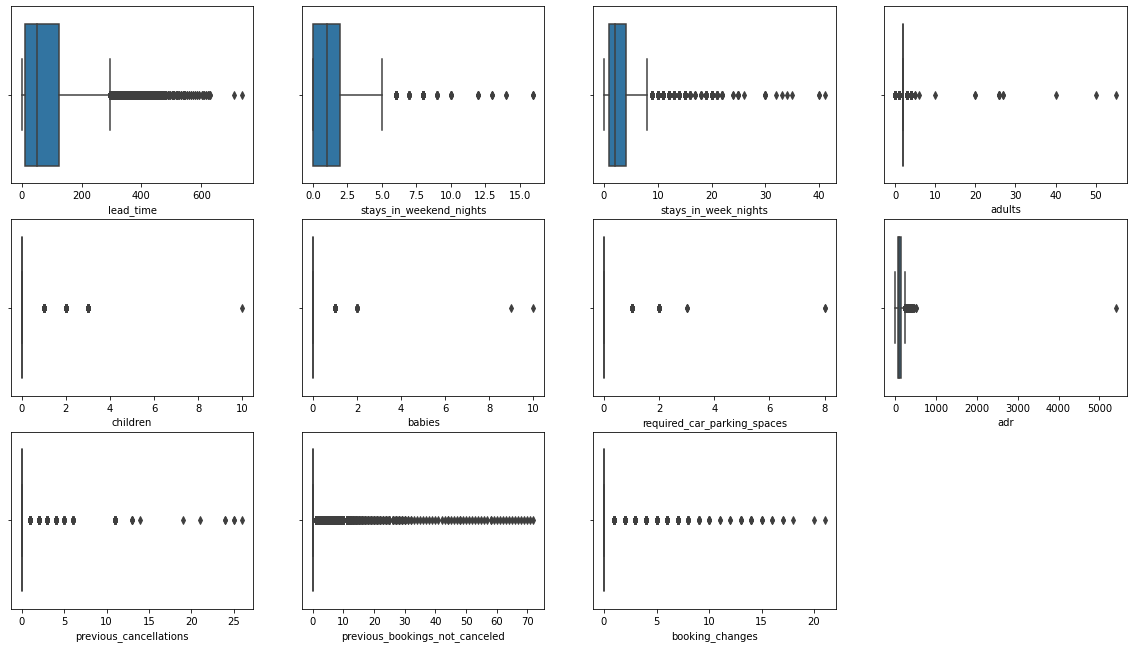

In [16]:
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
plt.figure(figsize=(20,15))
n=1
for col in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[col])

As we have found some outliers in our data,  need to perform series of operations to clean up the data.

In [17]:
#Operations to cleanup outliers.
df.loc[df.lead_time > 500, 'lead_time'] = 500
df.loc[df.stays_in_weekend_nights >=  5, 'stays_in_weekend_nights'] = 5
df.loc[df.adults > 4, 'adults'] = 4
df.loc[df.previous_bookings_not_canceled > 0, 'previous_bookings_not_canceled'] = 1
df.loc[df.previous_cancellations > 0, 'previous_cancellations'] = 1
df.loc[df.stays_in_week_nights > 10, 'stays_in_week_nights'] = 10
df.loc[df.booking_changes > 5, 'booking_changes'] = 5
df.loc[df.babies > 8, 'babies'] = 0
df.loc[df.required_car_parking_spaces > 5, 'required_car_parking_spaces'] = 0
df.loc[df.children > 8, 'children'] = 0
df.loc[df.adr >= 1000, 'adr'] = 800

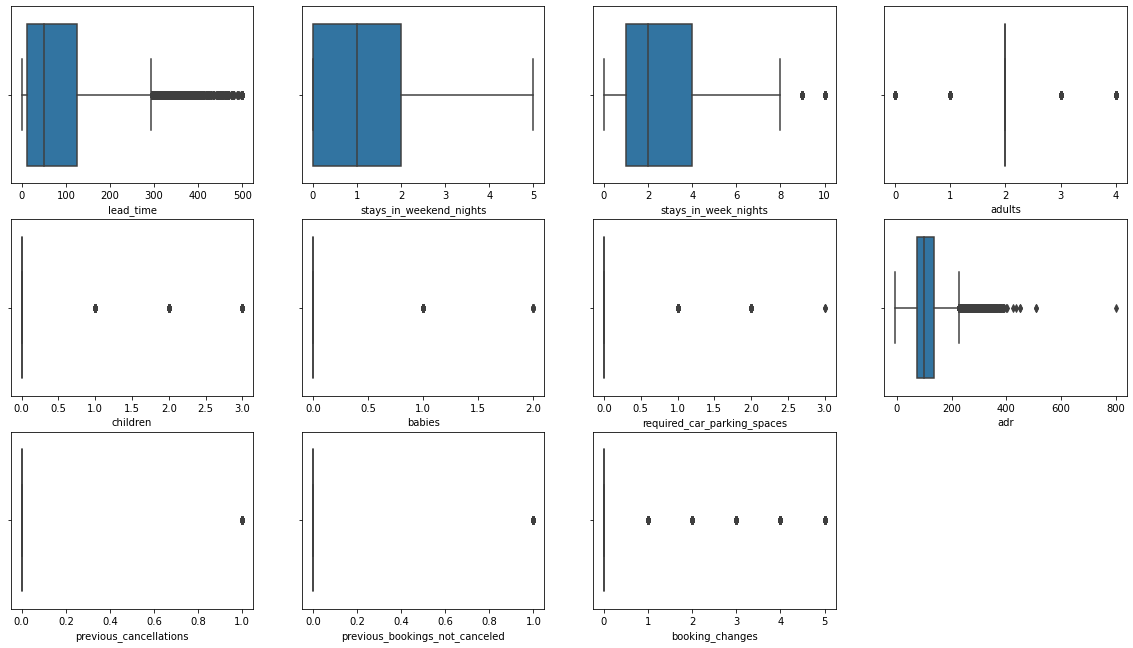

In [19]:
# rechecking outlier if any
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
plt.figure(figsize=(20,15))
n=1
for col in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[col])

**4. Data Type Corrections**

In [20]:
#Data Type Corrections.
df['arrival_date_year'] = df['arrival_date_year'].astype('str')
df['arrival_date_month'] = df['arrival_date_month'].astype('str')
df['arrival_date_day_of_month'] = df['arrival_date_day_of_month'].astype('str')

#creating a new column as arrival date by concatnate above three.
df['arrival_date'] = df['arrival_date_day_of_month'] + '-' + df['arrival_date_month'] + '-' + df['arrival_date_year']
df['arrival_date']

0            1-July-2015
1            1-July-2015
2            1-July-2015
3            1-July-2015
4            1-July-2015
               ...      
119385    30-August-2017
119386    31-August-2017
119387    31-August-2017
119388    31-August-2017
119389    29-August-2017
Name: arrival_date, Length: 86940, dtype: object

In [21]:
from datetime import datetime as dt
from datetime import date
df['arrival_date']=df['arrival_date'].apply(lambda x : dt.strptime(x,'%d-%B-%Y'))
df['arrival_date']

0        2015-07-01
1        2015-07-01
2        2015-07-01
3        2015-07-01
4        2015-07-01
            ...    
119385   2017-08-30
119386   2017-08-31
119387   2017-08-31
119388   2017-08-31
119389   2017-08-29
Name: arrival_date, Length: 86940, dtype: datetime64[ns]

In [22]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
1,Resort Hotel,0,500,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2015-07-01


### **INSIGHTS**

Text(0.5, 1.0, 'HOTEL')

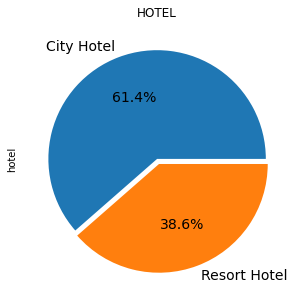

In [27]:
# which type of hotel would people prefer
hotel_type=df.hotel.value_counts()
a=hotel_type.plot.pie(figsize = (5,5),fontsize = 14,explode = (0, 0.05),autopct='%1.1f%%')
a.set_title('HOTEL')

In [28]:
df['adults'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53418.0,1.876427,0.544125,0.0,2.0,2.0,2.0,4.0
Resort Hotel,33522.0,1.871995,0.449991,0.0,2.0,2.0,2.0,4.0


In [29]:
df['children'].groupby(df['hotel']).describe()

,count,mean,std,min,25%,50%,75%,max
hotel,,,,,,,,
City Hotel,53418.0,0.131866,0.442199,0.0,0.0,0.0,0.0,3.0
Resort Hotel,33522.0,0.150618,0.475858,0.0,0.0,0.0,0.0,3.0


We can see by the above bar chart, that majority of the people preferred city hotel over resort hotel. Further we can clearly see the mean value of adults and children are higher in case of resort hotel, hence they are a better choice for larger families.

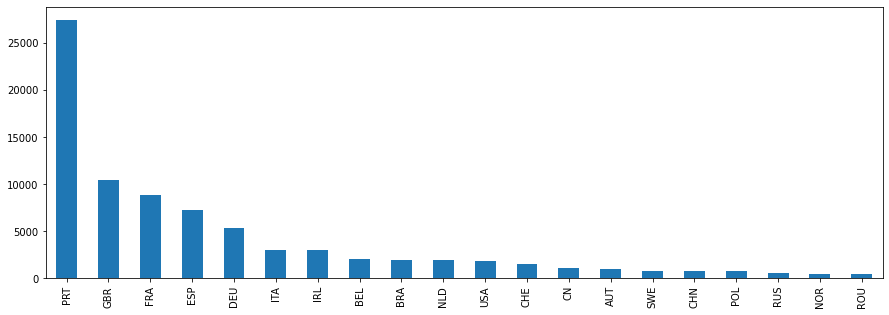

In [30]:
# country analysis
Country=df['country'].value_counts().head(20)
Country.plot.bar(figsize = (15,5),fontsize = 10)

In [31]:
# Top5  country 
Country.head(5)

PRT    27449
GBR    10433
FRA     8837
ESP     7252
DEU     5387
Name: country, dtype: int64

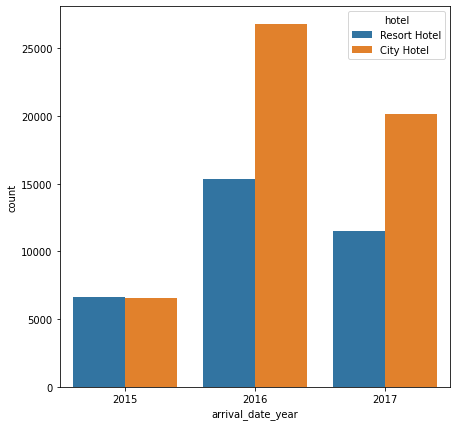

In [33]:
# Year of arrival
df.arrival_date_year.value_counts()
plt.figure(figsize=(7,7))
sns.countplot(data=df, x = 'arrival_date_year', hue = 'hotel' )
plt.show()

In 2016 we have highest no of customer.



In [34]:
# Highest customer By Month
df.arrival_date_month.value_counts()
# df.arrival_date_month.value_counts(normalize=True) #for Percentile value

August       11232
July         10024
May           8343
April         7871
June          7753
March         7459
October       6883
September     6659
February      6043
December      5082
November      4953
January       4638
Name: arrival_date_month, dtype: int64

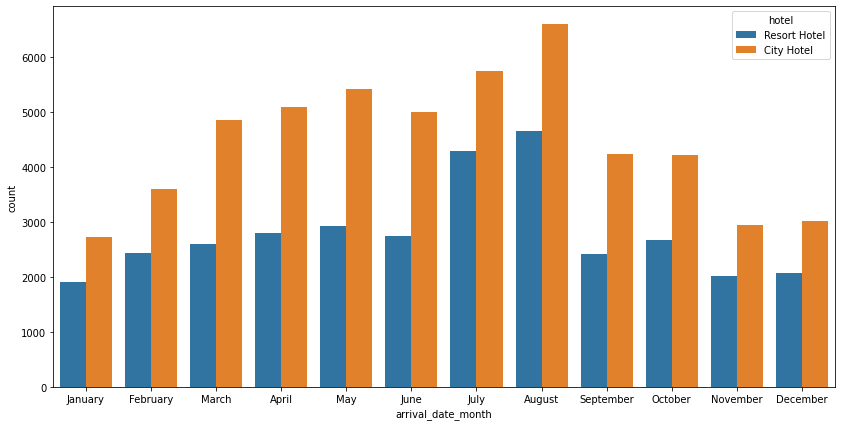

In [36]:
# checking month of arrival w.r.t hotels
new_order = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=new_order,ordered=True)
plt.figure(figsize=(14,7))
sns.countplot(data = df, x = 'arrival_date_month',hue='hotel')
plt.show()

August is the most occupied month with highest bookings and January is the least occupied month with less bookings.


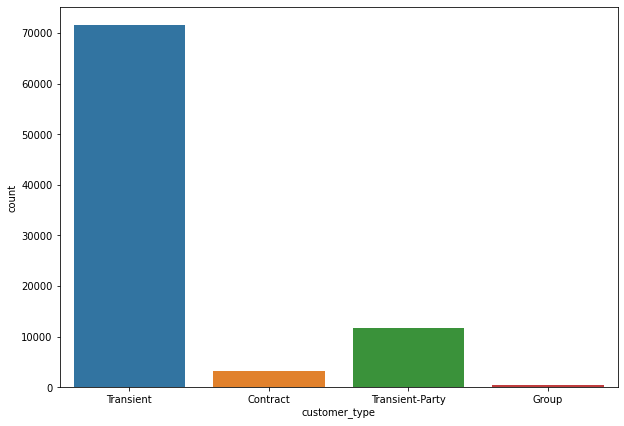

In [37]:
#customer_Type
df['customer_type'].value_counts()
plt.figure(figsize=(10,7))
sns.countplot(df['customer_type'])
plt.show()

Trasients are the most common customer 
type, they represent 75% of the total customers.

Meal Analysis
meal packages:
Undefined/SC — no meal package;

BB — Bed & Breakfast;

HB — Half board (breakfast and one other meal — usually dinner);

FB — Full board (breakfast, lunch and dinner)

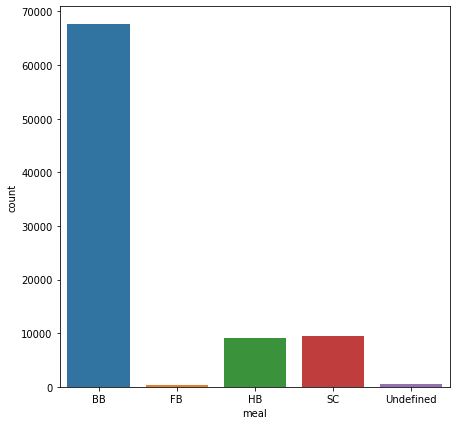

In [38]:
df.meal.value_counts()
plt.figure(figsize=(7,7))
sns.countplot(df['meal'])
plt.show()

Mostly Guest prefer Bed And Breakfast type meal.

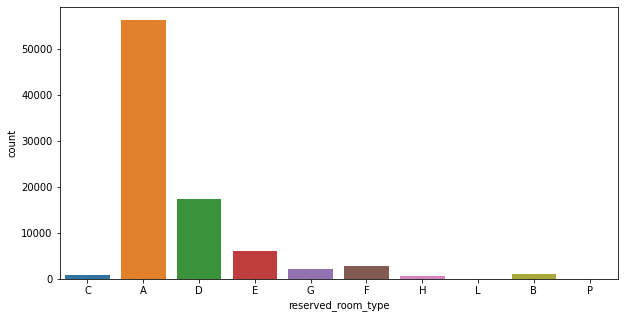

In [39]:
df['reserved_room_type'].value_counts(normalize=True)
plt.figure(figsize=(10,5))
sns.countplot(df['reserved_room_type'])
plt.show()

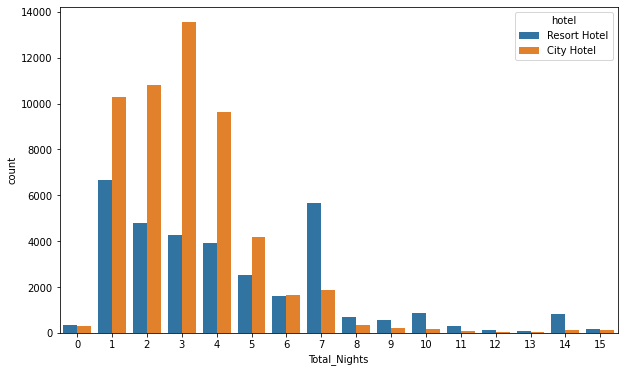

In [40]:
df['Total_Nights']=(df['stays_in_weekend_nights']+df['stays_in_week_nights'])
plt.figure(figsize=(10,6))
sns.countplot(data = df, x = 'Total_Nights',hue='hotel')
plt.show()

Most people stay for one, two, or three. More than 60% of guests come under these three options. But for long stay people prefer Resort hotel.

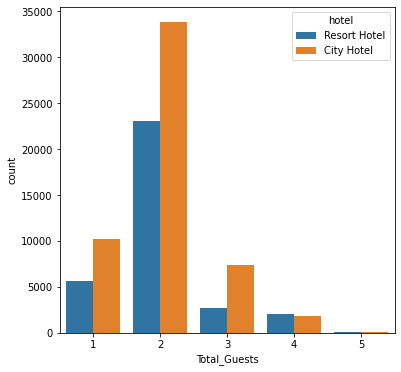

In [41]:
#Total people
df['Total_Guests']=(df['adults']+df['children']+df['babies']).astype(int)
df= df[df.Total_Guests > 0]
plt.figure(figsize=(6,6))
sns.countplot(data = df, x = 'Total_Guests',hue='hotel')
plt.show()

In [42]:
df.Total_Guests.value_counts(normalize=True).round(2)

2    0.66
1    0.18
3    0.12
4    0.04
5    0.00
Name: Total_Guests, dtype: float64

We will divide people staying in the hotel into 3 categories.
Single: 1 Adult only.

Couple: 2 Adults we can’t say for sure that these two people are an actual couple or not, data does not tell us anything about this, but we will assume they are couple. 

Family or Friends: More than 2 people including adults, children, and babies. (or alternatively, a group)


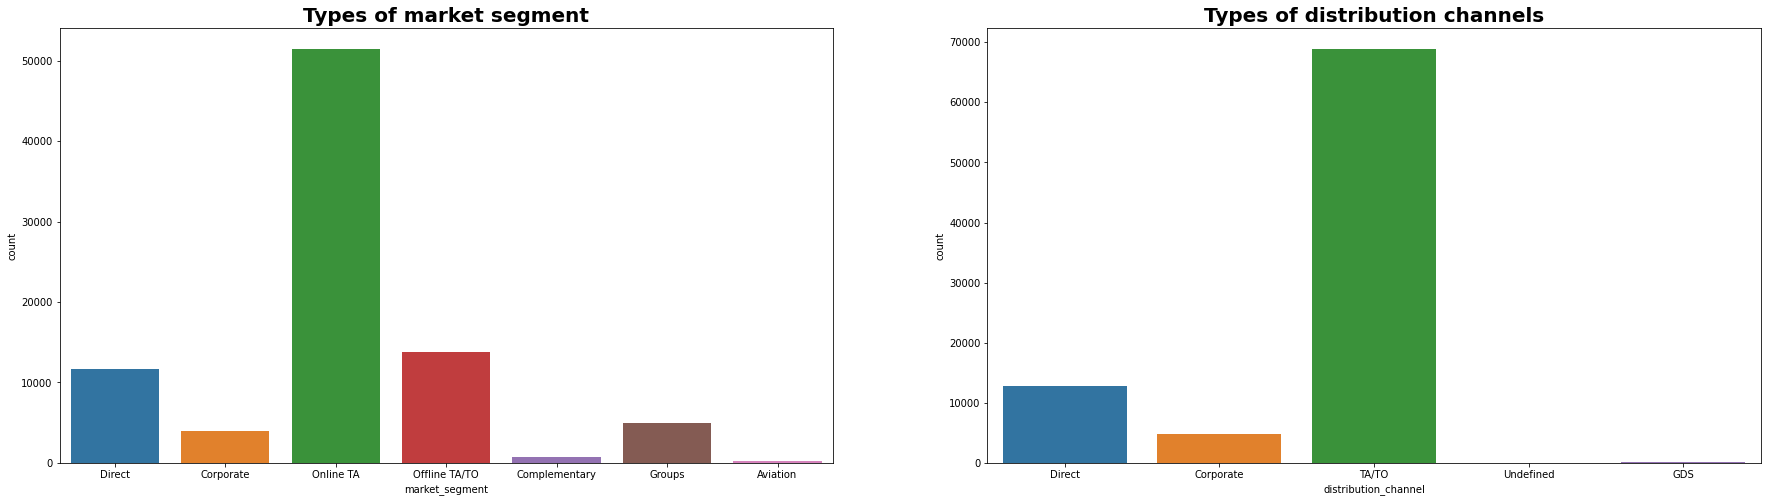

In [43]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)

#Market Segment
df['market_segment'].value_counts()
sns.countplot(df['market_segment'])
plt.title('Types of market segment',fontweight="bold", size=20)

plt.subplot(1, 2, 2)
#Distribution Channel
df.distribution_channel.value_counts()
sns.countplot(df['distribution_channel'])
plt.title('Types of distribution channels',fontweight="bold", size=20)
plt.subplots_adjust(right=1.7)
plt.show()

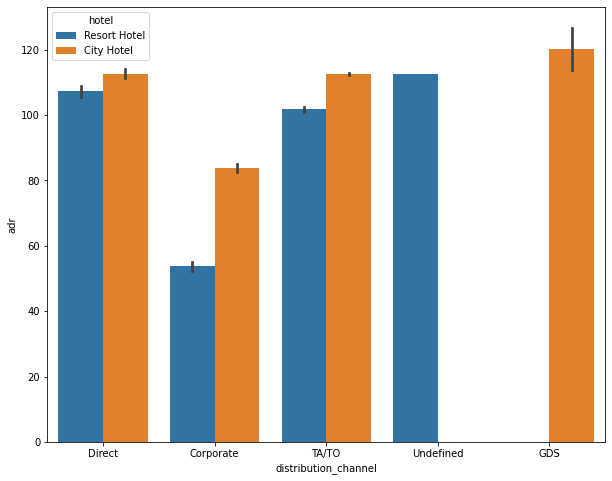

In [44]:
plt.figure(figsize=(10,8))
sns.barplot(x = df['distribution_channel'], y = df['adr'], hue = df['hotel'])

Majority of the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates.

GDS chennel making very high revenue for City Hotel but Not good for Resort Hotel.

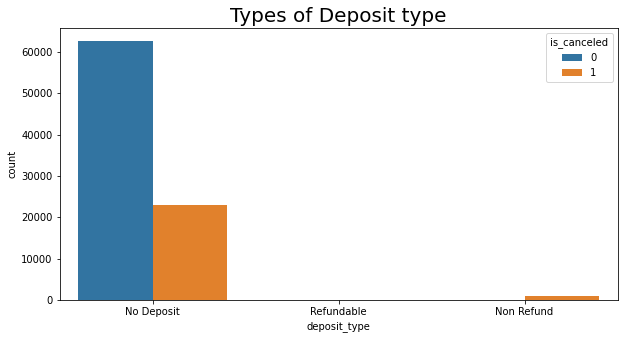

In [45]:
# Deposit Type
#No Deposit — no deposit was made;
#Non Refund — a deposit was made in the value of the total stay cost;
#Refundable — a deposit was made with a value under the total cost of stay.
plt.figure(figsize=(10, 5))

sns.countplot(data = df, x = 'deposit_type',hue='is_canceled')
plt.title('Types of Deposit type', size=20)
plt.show()


Around 25% of bookings were cancelled by guests with no deposit. These numbers are huge if the hotels were not able to replace the cancelled bookings in time. So it's obvious that guests who do not pay any deposit while booking are likely to cancel more reservations. Also it is interesting to note that non-refundable deposits had more cancellation than refundable deposits. Logically one would have assumed that refundable deposits have more cancellation as hotel rates are usually higher for refundable deposit type rooms and customers pay more in anticipation of cancellation.


0    0.917054
1    0.082589
2    0.000323
3    0.000035
Name: required_car_parking_spaces, dtype: float64


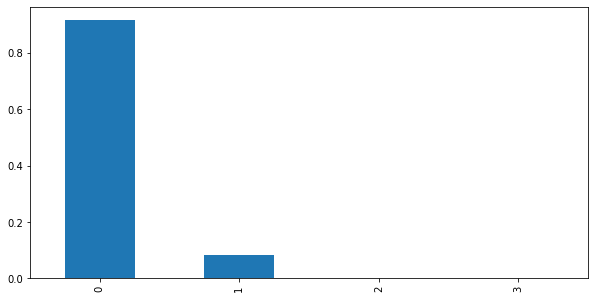

In [46]:
#Required Car Parking Spaces
Car_park=df.required_car_parking_spaces.value_counts(normalize=True)
print(Car_park)
Car_park.plot.bar(figsize = (10,5),fontsize = 10)
plt.show()

Around 93% customer Don't need any Car Parking space.

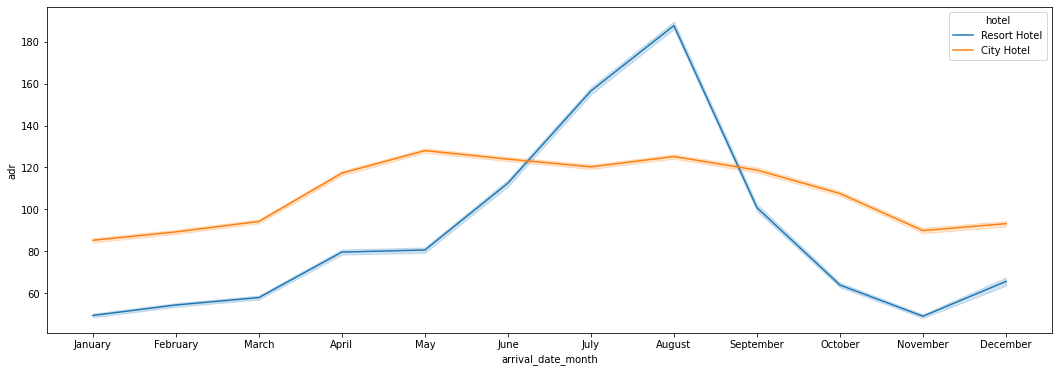

In [47]:
#Relation between prices and month 
#Avr Daily Rate monthwise
df['arrival_date_month'] = pd.Categorical(df['arrival_date_month'],categories=new_order,ordered=True)
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df) 
plt.show()

For both city and resort hotels, Nov to Jan have cheaper average daily rates. Also we can see prices for resort hotels are higher and fluctuate more than city hotels.

In [48]:
#Booking Analysis

#confirm booking 
confirmed_bookings = df[df.is_canceled==0]
confirmed_bookings['arrival_date_month'] = df['arrival_date'].dt.month
Confirm=confirmed_bookings['arrival_date_month'].value_counts().sort_index()
print(f'Confirm booking monthwise\n{Confirm}')
print(f'Total confirm={Confirm.sum()}\n')

#cancel booking 
canceled_bookings = df[df.is_canceled==1]
canceled_bookings['arrival_date_month'] = df['arrival_date'].dt.month
cancel=canceled_bookings['arrival_date_month'].value_counts().sort_index()
print(f'Canceled booking monthwise\n{cancel}')
print(f'Total canceled={cancel.sum()}')
df['is_canceled'] = df.is_canceled.replace([1,0], ['canceled', 'not_canceled']) 

Confirm booking monthwise
1     3594
2     4617
3     5607
4     5462
5     5890
6     5392
7     6820
8     7600
9     5016
10    5233
11    3881
12    3691
Name: arrival_date_month, dtype: int64
Total confirm=62803

Canceled booking monthwise
1     1036
2     1412
3     1828
4     2402
5     2442
6     2352
7     3190
8     3617
9     1635
10    1637
11    1052
12    1373
Name: arrival_date_month, dtype: int64
Total canceled=23976


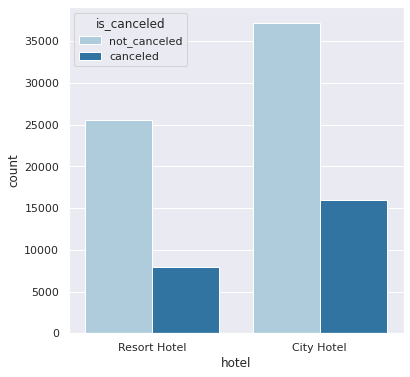

In [49]:
sns.set(rc = {'figure.figsize':(6,6)})
sns.countplot(data = df, x = 'hotel',hue='is_canceled',  palette='Paired')

In [46]:
print('Percent value')
print(df.is_canceled.value_counts(normalize=True)) # to del

Percent value
not_canceled    0.723712
canceled        0.276288
Name: is_canceled, dtype: float64


 we have a 37.13% of cancelations and 62.86% confirm booking. Majority(2/3rd's) of the hotel bookings are not canceled.

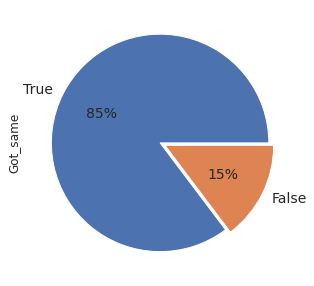

In [47]:
df_room=df[['reserved_room_type','assigned_room_type']]
df_room['Got_same'] = np.where(df_room['reserved_room_type'] ==df_room['assigned_room_type'], True, False)
cv=df_room['Got_same'].value_counts(normalize=True)
plt.figure(figsize=(5,5))
b=cv.plot.pie(figsize = (5,5),fontsize = 14,explode = (0, 0.05),autopct='%.0f%%')
#sns.pie(df_room['Got_same'])
plt.show()

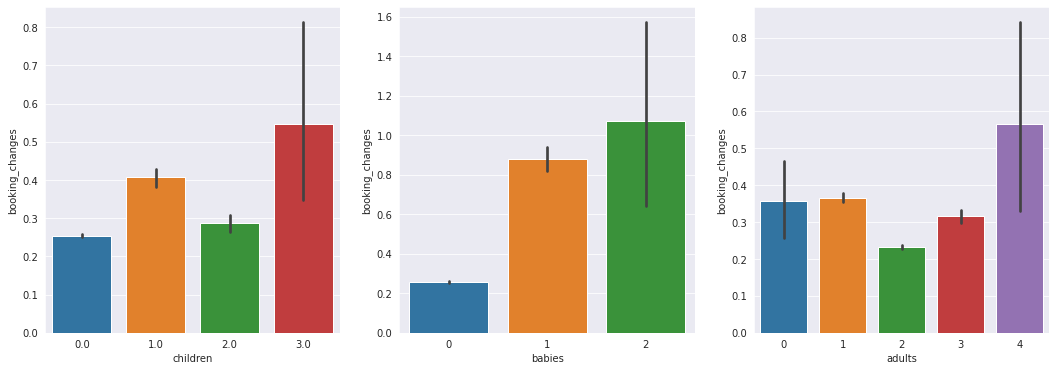

In [49]:
#Booking Changes
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.barplot(y='booking_changes', x='children', data= df) 

plt.subplot(1, 3, 2)
sns.barplot(y='booking_changes', x='babies', data= df)

plt.subplot(1, 3, 3)
sns.barplot(y='booking_changes', x='adults', data= df)
plt.show()

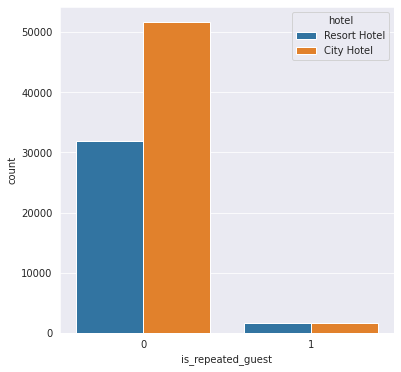

In [50]:
#Repeated Guest
plt.figure(figsize=(6,6))
sns.countplot(data=df, x='is_repeated_guest', hue='hotel')
plt.show()

Most customers are not repeating their booking.

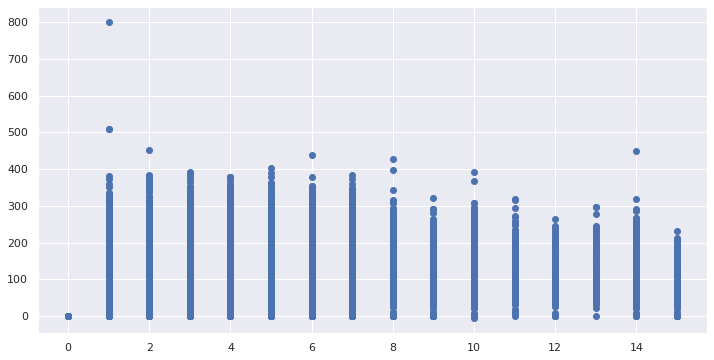

In [49]:
plt.figure(figsize=(12,6))
plt.scatter(df.Total_Nights, df.adr)
plt.show()

We can see that as length of total stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.

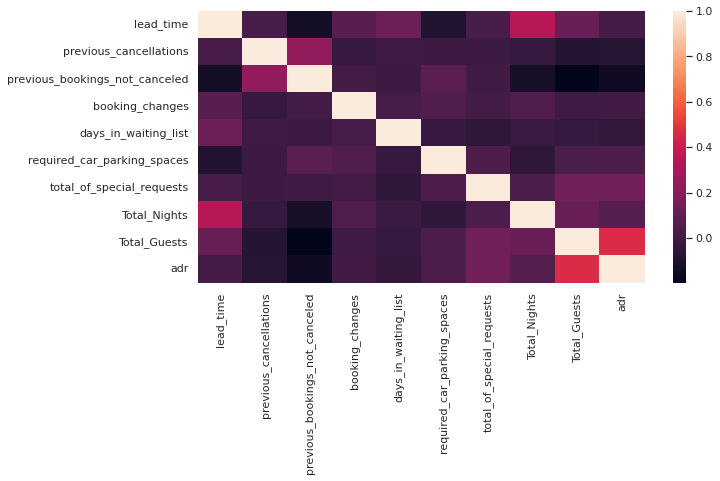

In [50]:
#Relation of columns
plt.figure(figsize=(10,5))
Corr_columns = df[['lead_time', 'previous_cancellations', 'previous_bookings_not_canceled','booking_changes','days_in_waiting_list','required_car_parking_spaces','total_of_special_requests','Total_Nights','Total_Guests','adr']]
corr_df =Corr_columns.corr()
sns.heatmap(corr_df)

 Total Night stay  and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before  the actual arrival.

adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

### CONCLUSION:
From above insights we have found :
1. Number of customer is greater in City Hotels as compared to Resort Hotels but Family with children prefers resort Hotel the most.

2. Portugal,Great Britain and France, ESP and DEU are the top countries from most guests come.

3. More than double bookings were made in 2016, compared to the previous year. But the bookings decreased by almost 15% next year.

4. Most bookings were made from July to August. And the least bookings were made at the start and end of the year.

5. There is no specific time in month when we get high or less booking. Entire month we have guest.

6. Getting Highest No of Trasient Customer(the booking is not part of a group or contract, and is not associated to other transient booking).

7. The Bed & Breakfast option is the most popular.

8. The “A” room type is the most popular among the clients, with 71.99% of the reservations.
9. Most people stay for one, two, or three. But For long Stay people prefer Resort Hotel.
    
    -> For Resort hotel, the most popular stay duration is three, two,one,and four days respectively.

    -> For City hotel, most popular stay duration is one, two, seven(week), and three respectively.

10. Couple (or 2 adults) is the most popular accommodation type. So hotels can make arrangement plans accordingly.

11. Majority of the bookings were made through online travel agent and the travel agents whether online/offline have the highest distribution rates.

12. Majority of the bookings don't have a deposit towards it.

13. Majority Of customer don't need Car parking space. So car parking space don't affect bookings.

14. For both city and resort hotels, Nov to Jan have cheaper average daily rates.

15. Majority(2/3rd's) of the hotel bookings are not canceled.

16. Most customers are not repeating their booking.

17. Majority of customers don't have any special request, But some have.

## **Inferences:**

The majority of reservations converts into successful transactions.

Majority of the hotels booked are city hotel.

No deposit policies lead to a higher cancellation rates.

Target months between May to Aug. Those are peak months due to the summer period.

Majority of the guests are from Western Europe. So target this area for more customers.

Since there are very few repeated guests, focus should be on retaining the customers after their first visit.
